
# Project: Investigate a Dataset - [TMBD-MOVIES]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> The dataset that has been selected for the purpose of this analysis is the movie dataset. The movie dataset includes name of the movie, genres, budget of the movie, revenue collected and others. This analysis will try to answer 3 questions posed below:
      
        

### Question(s) for Analysis
   1. what is the average runtime of movies?
   2. Which movies were on the top 10 box office during the period of the data collection according to profits,popularity,revenue and budget?
   2. What is the relationship between popularity and net profit,does popularity mean high profits, does the budget have a correlation with the profit??
   3. Which genres of movies had more appearances in the Top 10 movies list?
   4. which cast had more appearances during the time of collection of this data??

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
movie_df = pd.read_csv('tmdb-movies.csv')
movie_df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


>  Checking The columns in the dataset

In [3]:
# checking columns of our dataset
movie_df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [4]:
# checking for missing data in our datasets
movie_df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [5]:
# Checking for duplicates data
movie_df.duplicated().sum()

1

In [6]:
movie_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


>   From this we can see the some records have 0 for budget,revenue and runtime which are not possible.We will have to clean them up


### Data Cleaning
Issues that need to be addressed
1. There are some columns which were not relevant to our analysis so we wil have to delete them
2. There are some missing data in the dataset so we will drop them
3. There are some zero figures in our dataset so we will also remove them so our data can be clean 
4. Each movie had multiple labels for movies. We create a function to separate to analyse that column  


>   Deleting columns that are not relevant to our investigations

In [7]:
# Dropping columns not relevant to our investigation
movie_df.drop(columns = ['id', 'imdb_id','homepage', 'tagline', 'keywords', 'overview','release_date','vote_count', 'vote_average', 'budget_adj','revenue_adj'], inplace = True)

In [8]:
#Dropping all records with missing data
movie_df.dropna(inplace = True)
#Checking if there are still any duplicate record
movie_df.isnull().sum()

popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_year            0
dtype: int64

In [9]:
# Removing nay records with 0 in the budget and revenue columns for they also represent missing data
movie_df = movie_df[(movie_df.budget != 0) & (movie_df.revenue != 0)]

In [10]:
# checking our dataset
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3806 entries, 0 to 10848
Data columns (total 10 columns):
popularity              3806 non-null float64
budget                  3806 non-null int64
revenue                 3806 non-null int64
original_title          3806 non-null object
cast                    3806 non-null object
director                3806 non-null object
runtime                 3806 non-null int64
genres                  3806 non-null object
production_companies    3806 non-null object
release_year            3806 non-null int64
dtypes: float64(1), int64(4), object(5)
memory usage: 327.1+ KB


<a id='eda'></a>
## Exploratory Data Analysis.


### Question 1. what is the average runtime of movies?

In [11]:
movie_df.runtime.mean()

109.34655806621124

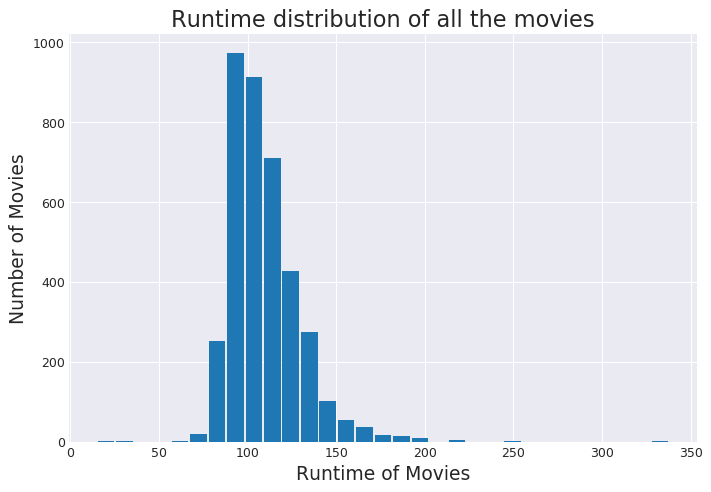

In [12]:
# lets plot a histogram of runtime of movies

sns.set_style('darkgrid')

plt.figure(figsize=(9,6), dpi = 90)
plt.xlabel('Runtime of Movies', fontsize = 15)
plt.ylabel('Number of Movies', fontsize=15)
plt.title('Runtime distribution of all the movies', fontsize=18)
plt.hist(movie_df['runtime'], rwidth = 0.9, bins =31);

#displays the plot
plt.show()

> Majority of the movies have a runtime from 90 to 125 min.

### Research Question 2 (Which movies were on the top 10 box office during the period of the data collection according to profits,popularity,revenue and budget?)

In [13]:
# I created a new column for proft. I used the actual figures for my analysis and not the ones adjusted for inflation 

movie_df['profit'] = movie_df['revenue'] - movie_df['budget']
movie_df.head(1)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_year,profit
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015,1363528810


> From the head table we can see the profit column has been created

In [14]:
# Retriving the top 10 movies according to profits earned
# This is our new clean dataset of the top ten movies ranked by profit
top_10_profit = movie_df.sort_values('profit', ascending = False).head(10)
top_10_profit.head(3)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_year,profit
1386,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2009,2544505847
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015,1868178225
5231,4.355219,200000000,1845034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,194,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,1997,1645034188


Text(0.5,1,'PROFIT OF TOP 10 MOVIES')

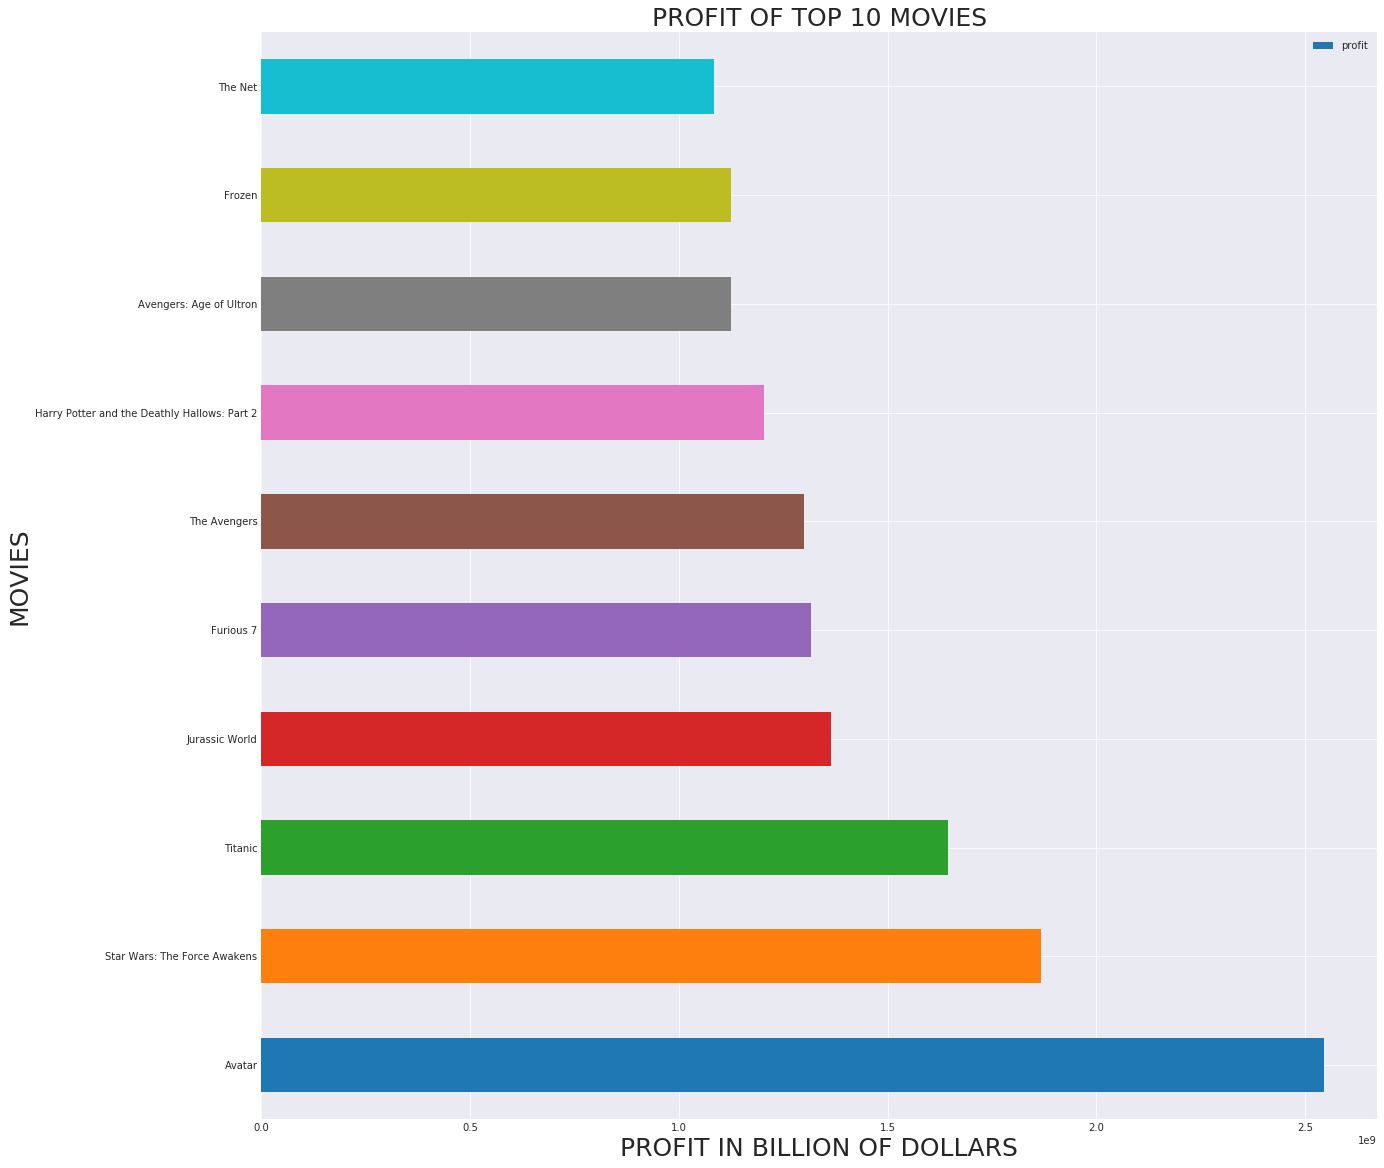

In [15]:
# Displaying the top 10 movies based on profit
top_10_profit.plot(x = 'original_title',y= 'profit', kind = 'barh', figsize =(20,20))
plt.ylabel('MOVIES', fontsize = 25)
plt.xlabel('PROFIT IN BILLION OF DOLLARS',fontsize= 25)
plt.title('PROFIT OF TOP 10 MOVIES',fontsize =25)

> From the bars we can see that Avatar was the highest in terms of profit followed by Star Wars:the Force Awakens

In [16]:
# Retriving the top 10 movies according to popularity gained.
top_10_popularity = movie_df.sort_values('popularity', ascending = False).head(10)
top_10_popularity.head(3)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_year,profit
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015,228436354
629,24.949134,165000000,621752480,Interstellar,Matthew McConaughey|Jessica Chastain|Anne Hath...,Christopher Nolan,169,Adventure|Drama|Science Fiction,Paramount Pictures|Legendary Pictures|Warner B...,2014,456752480


Text(0.5,1,'POPULARITY OF TOP 10 MOVIES')

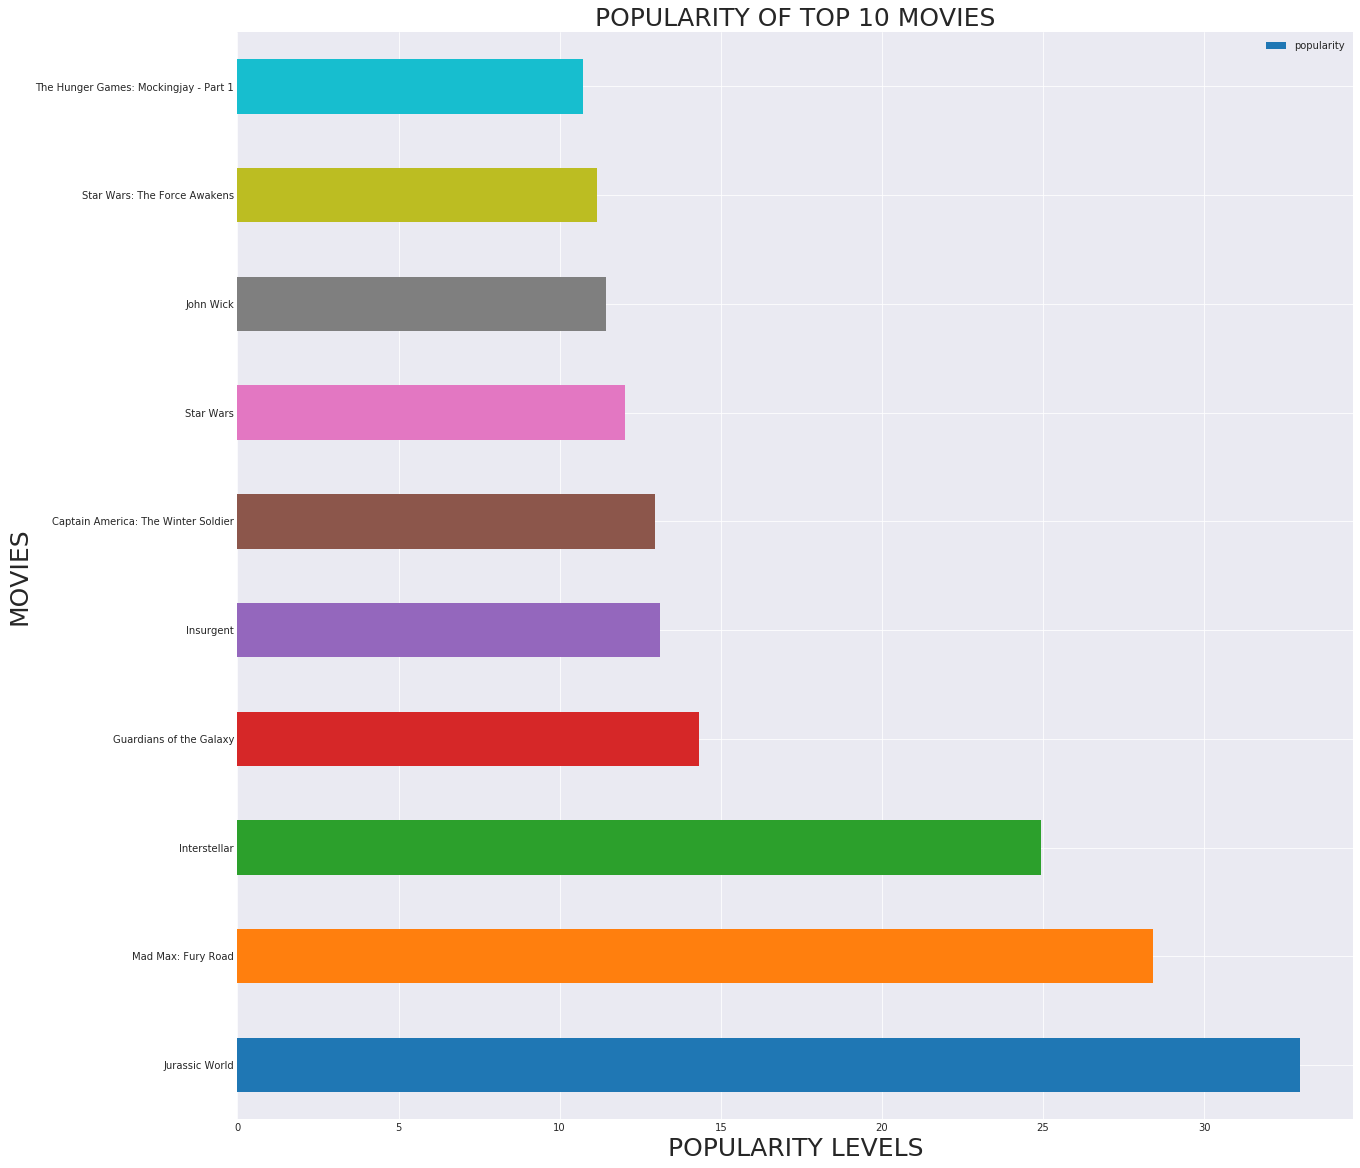

In [17]:
# Displaying the top 10 movies based on popularity
top_10_popularity.plot(x = 'original_title',y= 'popularity', kind = 'barh', figsize =(20,20))
plt.ylabel('MOVIES', fontsize = 25)
plt.xlabel('POPULARITY LEVELS',fontsize= 25)
plt.title('POPULARITY OF TOP 10 MOVIES',fontsize =25)

> The most popular movie is Jurassic World followed by Mad Max: Fury Road with Hunger Games: Mockingjay part 1 in the top 10.

In [18]:
# Retriving the top 10 movies according to revenue earned
top_10_revenue = movie_df.sort_values('revenue', ascending = False).head(10)
top_10_revenue.head(3)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_year,profit
1386,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2009,2544505847
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015,1868178225
5231,4.355219,200000000,1845034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,194,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,1997,1645034188


Text(0.5,1,'REVENUE OF TOP 10 MOVIES')

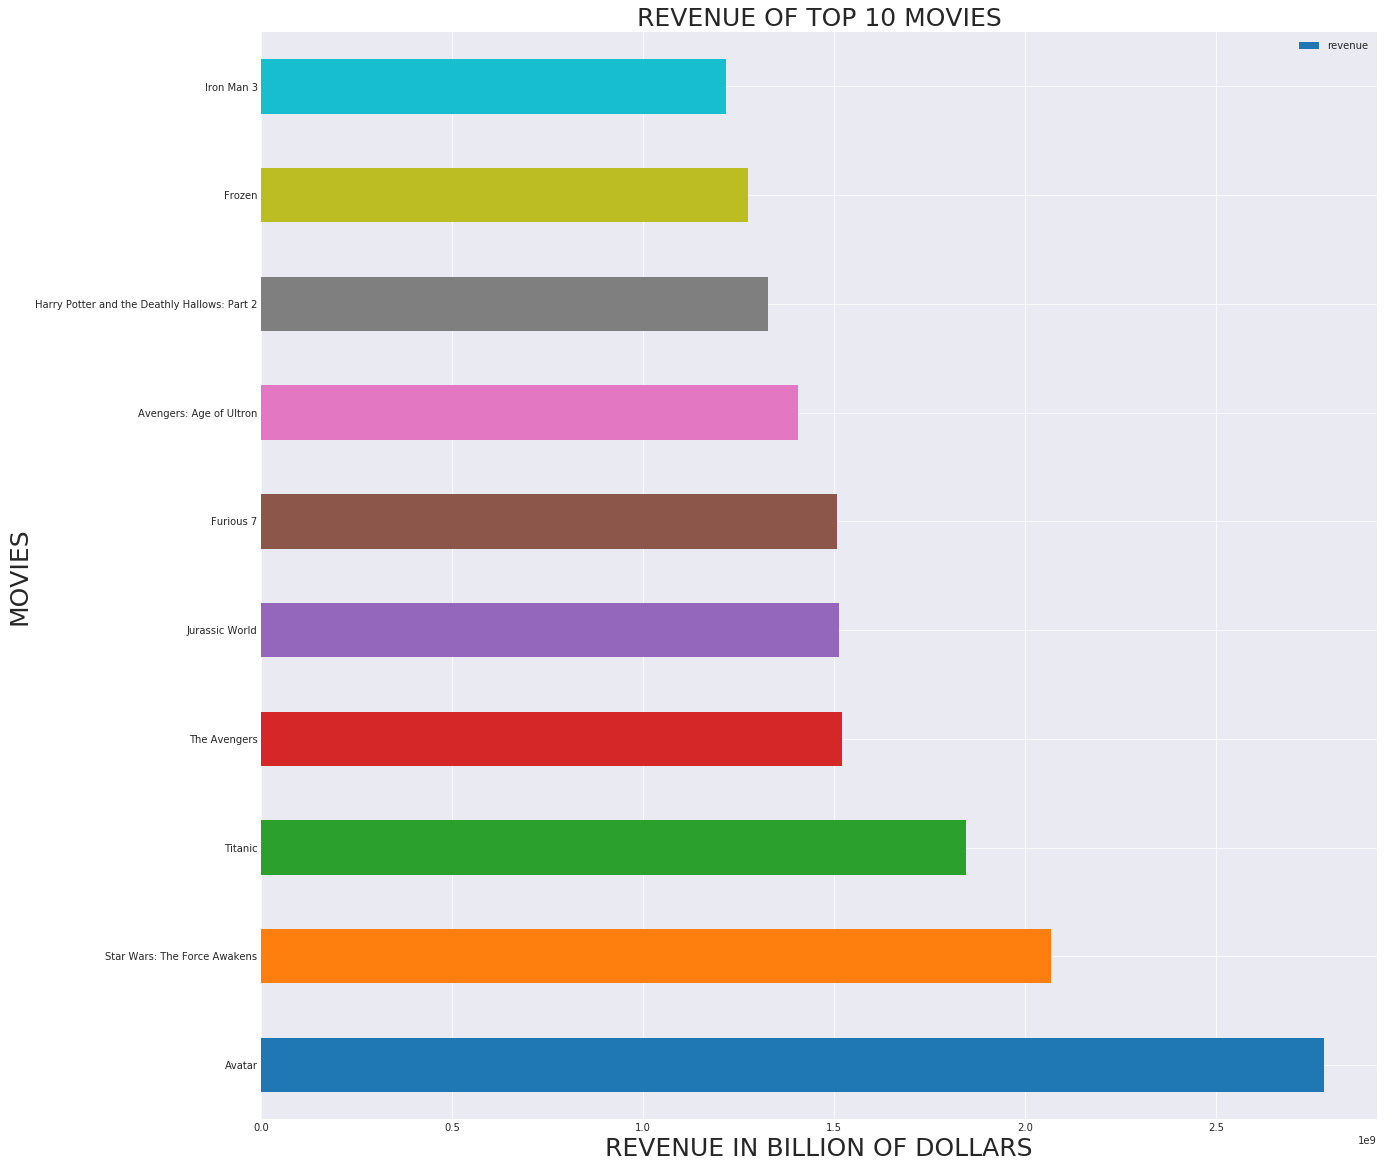

In [19]:
# Displaying the top 10 movies based on revenue
top_10_revenue.plot(x = 'original_title',y= 'revenue', kind = 'barh', figsize =(20,20))
plt.ylabel('MOVIES', fontsize = 25)
plt.xlabel('REVENUE IN BILLION OF DOLLARS',fontsize= 25)
plt.title('REVENUE OF TOP 10 MOVIES',fontsize =25)

> Avatar still stands as top in the revenue category followed by Star Wars: The Force Awakens

In [20]:
# Retriving the top 10 movies according to budget invested
top_10_budget = movie_df.sort_values('budget', ascending = False).head(10)
top_10_budget.head(3)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_year,profit
2244,0.250540,425000000,11087569,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,100,Adventure|Fantasy|Action|Western|Thriller,Boram Entertainment Inc.,2010,-413912431
3375,4.955130,380000000,1021683000,Pirates of the Caribbean: On Stranger Tides,Johnny Depp|PenÃ©lope Cruz|Geoffrey Rush|Ian M...,Rob Marshall,136,Adventure|Action|Fantasy,Walt Disney Pictures|Jerry Bruckheimer Films|M...,2011,641683000
7387,4.965391,300000000,961000000,Pirates of the Caribbean: At World's End,Johnny Depp|Orlando Bloom|Keira Knightley|Geof...,Gore Verbinski,169,Adventure|Fantasy|Action,Walt Disney Pictures|Jerry Bruckheimer Films|S...,2007,661000000


Text(0.5,1,'BUDGET OF TOP 10 MOVIES')

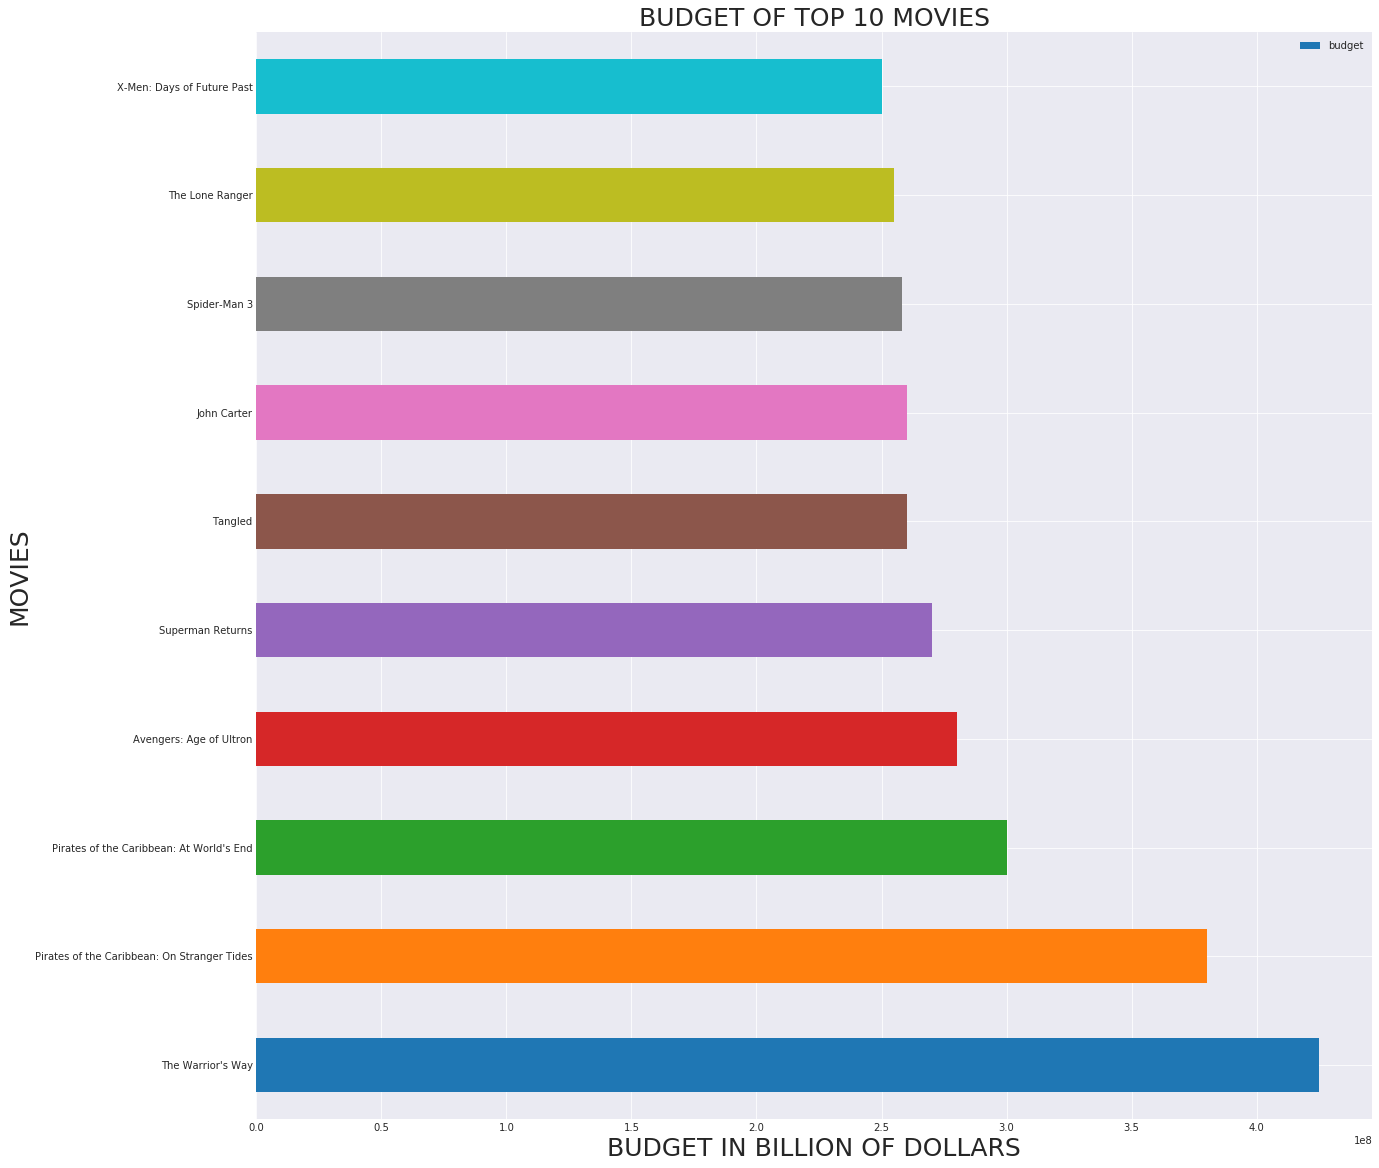

In [21]:
# Displaying the top 10 movies based on BUDGET
top_10_budget.plot(x = 'original_title',y= 'budget', kind = 'barh', figsize =(20,20))
plt.ylabel('MOVIES', fontsize = 25)
plt.xlabel('BUDGET IN BILLION OF DOLLARS',fontsize= 25)
plt.title('BUDGET OF TOP 10 MOVIES',fontsize =25)

> The warrior's way has the highest budget of them all with X-Men Days of Future Past as the least in the top 10

### Research Question 2  (2.i) What is the relationship between popularity and profit ii) does the revenue have a correlation with the profit?)

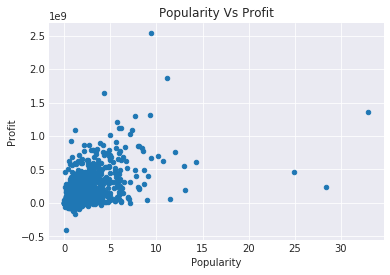

In [22]:
# # ploting a scatter graph of the relationship between proft and budget
# top_10_profit.plot.scatter(x = 'profit', y = 'budget',s = 30 , c = 'purple');
# Scatter plot of Revenue vs Popularity
movie_df.plot(x='popularity',y='profit',kind='scatter')
plt.title('Popularity Vs Profit')
plt.xlabel('Popularity')
plt.ylabel('Profit');

> As Profit inceases it doesn't neccesarily mean the movie is popular

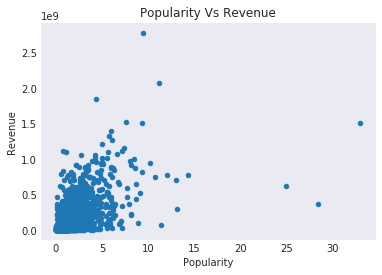

In [23]:
# Scatter plot of   Popularity vs Revenue
movie_df.plot(x='popularity',y='revenue',kind='scatter')
plt.legend()
plt.title('Popularity Vs Revenue')
plt.xlabel('Popularity')
plt.ylabel('Revenue')
plt.grid();

>  Revenue increases with increase in Popularity.

### Question 3.(Which genres of movies had more appearances in the Top 10 movies list?)

In [24]:
#creating a funstion to separate the genres separated by '|' 
def data(column):
    #will take a column, and separate the string by '|'
    data = movie_df[column].str.cat(sep = '|')
    data = pd.Series(data.split('|'))
    count = data.value_counts(ascending = False)
    
    return count

In [25]:
#variable to store the retured value
count = data('genres')
count.head(10)

Drama              1730
Comedy             1335
Thriller           1195
Action             1077
Adventure           743
Romance             658
Crime               650
Science Fiction     518
Horror              459
Family              417
dtype: int64

> Here we have a list of different genres

Text(0.5,1,'GENRES OF TOP 10 MOVIES')

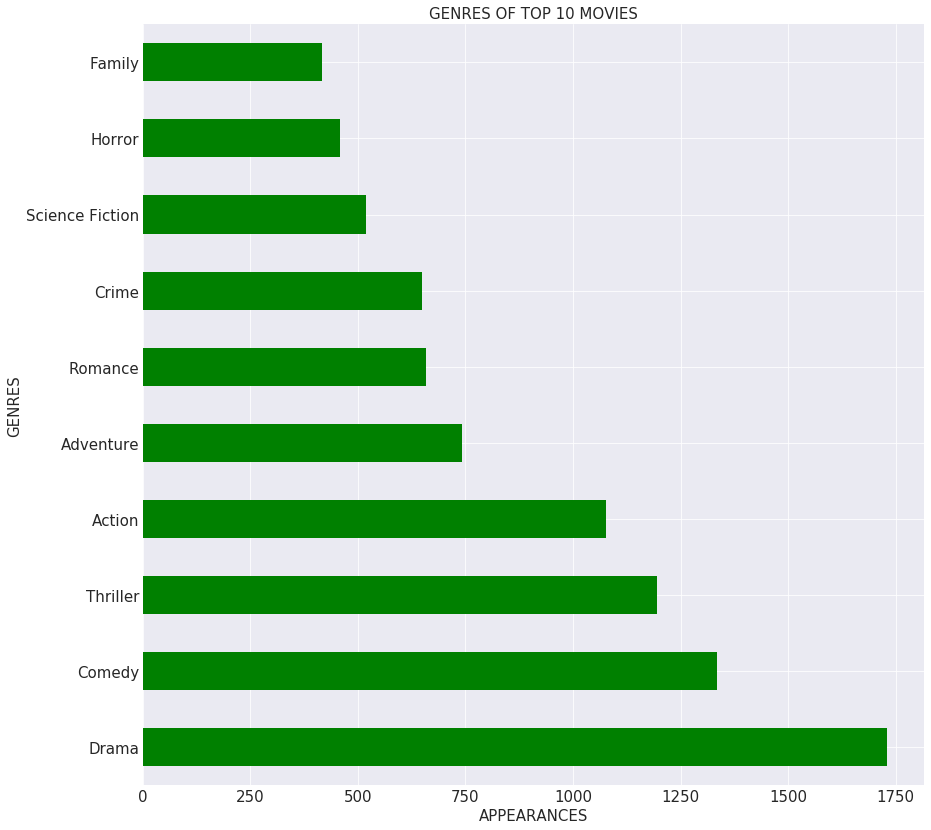

In [26]:
# Visualisation of most profitable genres
genre_10 = count.head(10)
genre_10.plot.barh(color = 'green', fontsize = 15, figsize = (14,14))
plt.ylabel('GENRES', fontsize = 15)
plt.xlabel('APPEARANCES',fontsize= 15)
plt.title('GENRES OF TOP 10 MOVIES',fontsize =15)

> We can see that Drama is the most acted Genre

### Question 4. Which cast member had more movie appearances?

In [27]:
# Retrieving the top ten most appearances of the cast members
count = data('cast')
count.head(10)

Robert De Niro       52
Bruce Willis         46
Samuel L. Jackson    44
Nicolas Cage         43
Matt Damon           36
Johnny Depp          35
Tom Hanks            34
Morgan Freeman       34
Brad Pitt            34
Harrison Ford        34
dtype: int64

The cast that had more apearances in movies is Robert De Niro with 52 appearances

<a id='conclusions'></a>
## Conclusions

>  1. The 

>  1. The top movies by highest revenue and by net profit are not the same.The top movies by highest revenue is Avatar and the top movies by highest net profit is Star Wars. The most popular moovie in the top 10 is Jurassic world and finally the movie with the highest expenditure is The Warrior's Way.

>  2. From the second analysis we can say that prodit does not correlate with popularity or budget. That is to say profit isn't determine by any of two factors(popularity or budget)

>  3. From our analysis we can conclude that Action and Adventure movies had more appearances in the top ten category according to profit. So if a production company wants to make high profits they should consider these two genres first (This observation was from our scatter graph without any statistical calculations)

>  4. Using the funtion created earlier I sepepated the names on the cast column and found Robert De Niro acted more movies during the time the data was collected.

## Limitation
> 1. The dataset included non-null,non-duplicate and also zero values. The conclusions would have been better if the datasets was complete. Bad quality of data may result to inaccurate conclusions. 

> 2. Most movies had more than one genre associated to some movies which limited our analysis in discovered which genre had more influence on watcher's interest

## REFRENCE
- Help from collegues on slack
- Stackoverflow

In [28]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0